**IMPORTING LIBRARIES**

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**CONNECTING WITH MYSQL DATABASE**

In [ ]:
db=mysql.connector.connect(
    host="localhost",
    user="root",
    password="prad@123",
    database="ola"
)

In [ ]:
mycursor=db.cursor()
mycursor.execute("SHOW TABLES")
for table in mycursor.fetchall():
    print(table)

('employee_dataset',)


In [ ]:
query="SELECT * from employee_dataset"
df=pd.read_sql(query,db)

**DISPLAYING DATASET**

In [ ]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,MyUnknownColumn,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,IT,Male,55,Specialist,,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63
1,2,Finance,Male,29,Developer,,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72
2,3,Finance,Male,55,Specialist,,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17
3,4,Customer Support,Female,48,Analyst,,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86
4,5,Engineering,Female,36,Analyst,,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(76898, 19)

In [ ]:
# TOTAL RECORDS IN DATASET

In [ ]:
print(len(df))

76898


In [ ]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,76898.000000,76898.000000,76898.000000,76898.000000,76898.000000,76898.000000,76898.000000,76898.000000,76898.000000,76898.000000,76898.0000,76898.000000,76898.000000,76898.000000
mean,38449.500000,41.013667,4.484369,3.000403,6405.776483,44.954030,24.458725,14.538076,7.010052,50.110536,10.0145,49.580353,0.999545,3.001382
std,22198.684837,11.257123,2.864618,1.416396,1373.475741,8.940133,14.465330,8.673014,4.331665,35.351258,5.4990,28.882139,0.815383,1.150715
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,1.000000
25%,19225.250000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.0000,25.000000,0.000000,2.010000
50%,38449.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.0000,49.000000,1.000000,3.000000
75%,57673.750000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.0000,75.000000,2.000000,4.000000
max,76898.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.0000,99.000000,2.000000,5.000000


**1.TOTAL EMPLOYEES BASED ON GENDER**

In [ ]:
x=pd.read_sql_query("select Gender, count(*) as total from employee_dataset group by Gender order by total desc",db)
x

,Gender,total
0,Female,36946
1,Male,36938
2,Other,3014


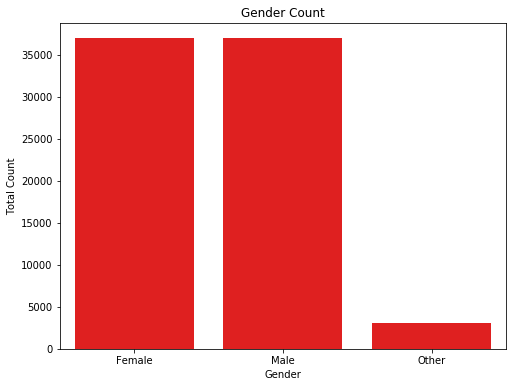

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender',y='total',data=x,color='r')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Gender Count')
plt.show()

**2.TOTAL EMPLOYEES IN EACH DEPARTMENT**

In [ ]:
x = pd.read_sql_query("SELECT Department, COUNT(*) AS total FROM employee_dataset GROUP BY Department ORDER BY total DESC", db)
x

,Department,total
0,Finance,8671
1,Legal,8622
2,Operations,8571
3,IT,8570
4,Marketing,8553
5,Customer Support,8552
6,Sales,8505
7,HR,8449
8,Engineering,8405


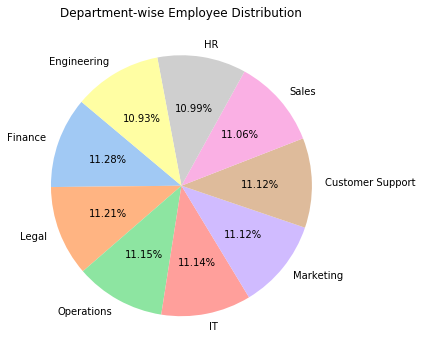

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(x['total'], labels=x['Department'], autopct='%2.2f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Department-wise Employee Distribution')
plt.show()

**3. TOTAL EMPLOYEES BASED ON JOB TITLE**

In [ ]:
x=pd.read_sql_query("""select job_title, count(*) as total_strength from employee_dataset group by job_title""",db)
x

,job_title,total_strength
0,Specialist,11195
1,Developer,10882
2,Analyst,10964
3,Manager,10990
4,Technician,10971
5,Engineer,10934
6,Consultant,10962


**4.TOTAL EMPLOYEES COUNT BASED ON EDUCATION LEVEL**

In [ ]:
x=pd.read_sql_query("""select Education_Level, count(*) as total_count from employee_dataset group by Education_Level""",db)
x

,Education_Level,total_count
0,High School,23084
1,Bachelor,38458
2,Master,11503
3,PhD,3853


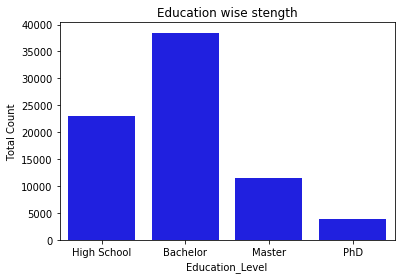

In [ ]:
sns.barplot(x='Education_Level',y='total_count',data=x,color='b')
plt.xlabel('Education_Level')
plt.ylabel('Total Count')
plt.title('Education wise stength')
plt.show()

In [ ]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,MyUnknownColumn,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,IT,Male,55,Specialist,,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63
1,2,Finance,Male,29,Developer,,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72
2,3,Finance,Male,55,Specialist,,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17
3,4,Customer Support,Female,48,Analyst,,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86
4,5,Engineering,Female,36,Analyst,,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25


**5.AVERAGE AGE OF EACH DEPATRMENT**

In [ ]:
x=pd.read_sql_query("""select Department,avg(Age) as Avg_age from employee_dataset
                        group by department order by Avg_age desc""",db)
x

,Department,Avg_age
0,Marketing,41.1728
1,Engineering,41.1454
2,Operations,41.0253
3,HR,41.0245
4,Finance,41.0197
5,Legal,41.0160
6,IT,40.9912
7,Customer Support,40.8970
8,Sales,40.8323


**6.AVERAGE WORKING YEARS OF EACH DEPARTMENT**

In [ ]:
x=pd.read_sql_query("""select Department,avg(Years_At_Company) as Avg_Yrs from employee_dataset
                        group by department order by Avg_Yrs desc""",db)
x

,Department,Avg_Yrs
0,Marketing,4.5105
1,Customer Support,4.5078
2,Finance,4.5049
3,Legal,4.4973
4,Engineering,4.4783
5,Operations,4.4735
6,HR,4.4695
7,IT,4.4693
8,Sales,4.4474


**7.AVERAGE WORKING YEARS OF EACH JOB**

In [ ]:
x=pd.read_sql_query("""select Job_title,avg(Years_At_Company) as Avg_Yrs from employee_dataset
                        group by job_title order by Avg_Yrs desc""",db)
x

,Job_title,Avg_Yrs
0,Technician,4.5250
1,Engineer,4.4945
2,Analyst,4.4901
3,Specialist,4.4885
4,Developer,4.4753
5,Consultant,4.4694
6,Manager,4.4476


**8.AVERAGE PERFORMANCE SCORE OF EACH DEPARTMENT OUT OF 5**

In [ ]:
x=pd.read_sql_query("""select Department,avg(Performance_Score) as Avg_score from employee_dataset
                        group by Department order by Avg_score desc""",db)
x

,Department,Avg_score
0,Operations,3.0291
1,Engineering,3.0246
2,Sales,3.0116
3,IT,2.9980
4,HR,2.9956
5,Customer Support,2.9952
6,Legal,2.9885
7,Finance,2.9809
8,Marketing,2.9808


**9.HIGHEST MONTHLY SALARY**

In [ ]:
#Find the highest salary
pd.read_sql_query("""SELECT Employee_ID, Department, Monthly_Salary
                        FROM employee_dataset
                        WHERE Monthly_Salary IN (
                            SELECT MAX(Monthly_Salary)
                            FROM employee_dataset
                            GROUP BY Department)""",db)

,Employee_ID,Department,Monthly_Salary
0,22,Sales,9000
1,36,HR,9000
2,40,HR,9000
3,117,Legal,9000
4,119,IT,9000
...,...,...,...
4390,76750,Customer Support,9000
4391,76813,Marketing,9000
4392,76830,Marketing,9000
4393,76843,Engineering,9000


**10.HIGHEST PACKAGE**

In [ ]:
pd.read_sql_query("""select max(Monthly_salary)*12 as Highest_Package from employee_dataset""",db)

,Highest_Package
0,108000


**11.AVERAGE SALARY PER MONTH FOR EACH JOB TITLE.**

In [ ]:
#Get the average salary per month for each job title.
x=pd.read_sql_query("""SELECT Job_Title, AVG(Monthly_Salary) AS Avg_Salary
                        FROM employee_dataset
                        GROUP BY Job_Title""",db)

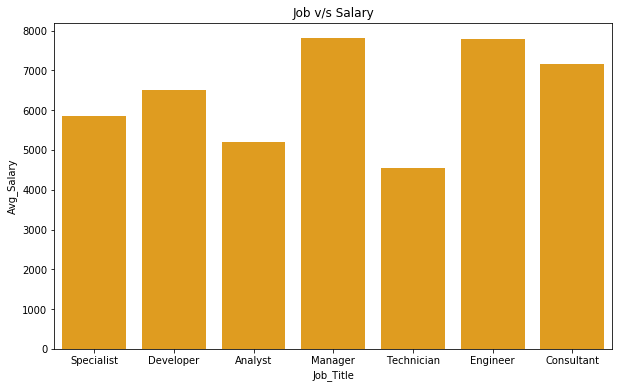

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Title',y='Avg_Salary',data=x,color='orange')
plt.xlabel('Job_Title')
plt.ylabel('Avg_Salary')
plt.title('Job v/s Salary')
plt.show()

**13.EMPLOYEES GETTING MORE THAN AVG SALARY**

In [ ]:
x=pd.read_sql_query("""select employee_id, monthly_salary from employee_dataset
                    where monthly_salary>(select avg(monthly_salary) from employee_dataset)""",db)
print("Total Employees who are getting more than avg salary is: ",len(x))

Total Employees who are getting more than avg salary is:  39505


In [ ]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,MyUnknownColumn,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,IT,Male,55,Specialist,,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63
1,2,Finance,Male,29,Developer,,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72
2,3,Finance,Male,55,Specialist,,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17
3,4,Customer Support,Female,48,Analyst,,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86
4,5,Engineering,Female,36,Analyst,,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25


**14.EMPLOYESS MORE THAN 5 YRS AT COMPANY BUT NO PROMOTION**

In [ ]:
#Find employees who have more than 5 years at the company but haven't received any promotions.
x=pd.read_sql_query("""select employee_id,years_at_company from employee_dataset
                        where years_at_company>5 and Promotions=0 """,db)
x

,employee_id,years_at_company
0,3,8
1,6,8
2,8,9
3,12,9
4,19,8
...,...,...
10207,76867,7
10208,76870,8
10209,76874,6
10210,76888,9


In [ ]:
print("Total employees who have more than 5 years at the company but haven't received any promotions",len(x))

Total employees who have more than 5 years at the company but haven't received any promotions 10212


**15.TOTAL PROMOTIONS BY DEPARTMENT**

In [ ]:
pd.read_sql_query("""select Department, sum(Promotions) as Total_Promotions
                     from employee_dataset group by department
                     order by Total_Promotions desc""",db)

,Department,Total_Promotions
0,Finance,8680.0
1,Legal,8619.0
2,Customer Support,8614.0
3,IT,8599.0
4,Operations,8570.0
5,Marketing,8548.0
6,Sales,8501.0
7,HR,8417.0
8,Engineering,8315.0


**16.EMPLOYESS COUNT WITH LESS NUMBER OF SICK LEAVES**

In [ ]:
#employees who have taken the least number of sick days in their department.
x=pd.read_sql_query("""select Employee_ID, Department from employee_dataset where sick_days <2""",db)

In [ ]:
len(x)

10309

**17.DEPARTMENT WITH HIGHEST NUMBER OF AVG SATISFACTION SCORE**

In [ ]:
#Find the top department with the highest average employee satisfaction score
x=pd.read_sql_query("""select department,avg(Employee_Satisfaction_Score) as Avg_SS from employee_dataset
                        group by department order by Avg_SS desc limit 1""",db)

In [ ]:
x

,department,Avg_SS
0,Operations,3.030814


**18.EMPLOYEES WHO WORK MORE THAN 50 HOURS PER WEEK AND HAVE HANDLED MORE THAN 15 PROJECTS**

In [ ]:
#Find employees who work more than 50 hours per week and have handled more than 15 projects.
x=pd.read_sql_query("""SELECT Employee_ID, Work_Hours_Per_Week, Projects_Handled
                    FROM employee_dataset WHERE Work_Hours_Per_Week > 50 AND Projects_Handled > 15""",db)

In [ ]:
x

,Employee_ID,Work_Hours_Per_Week,Projects_Handled
0,7,55,20
1,9,51,23
2,26,59,24
3,27,59,24
4,37,53,42
...,...,...,...
16665,76886,58,30
16666,76891,57,16
16667,76894,58,27
16668,76895,56,32


**19.CATEGORIZING EMPLOYEE INTO NEW AND EXPERIENCED BASED ON YEAR AT COMPANY**

In [ ]:
x=pd.read_sql_query("""SELECT
                        COUNT(CASE WHEN Years_At_Company < 3 THEN 1 END) AS New_Employees,
                        COUNT(CASE WHEN Years_At_Company >= 3 THEN 1 END) AS Experienced_Employees
                    FROM employee_dataset;""",db)
x

,New_Employees,Experienced_Employees
0,23205,53693


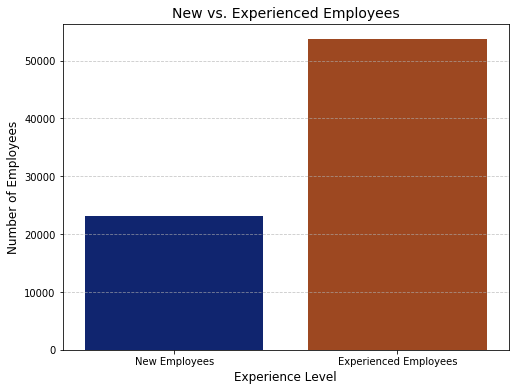

In [ ]:
df1 = pd.DataFrame({'Category': ['New Employees', 'Experienced Employees'],
                   'Count': [x['New_Employees'][0], x['Experienced_Employees'][0]]})
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Category', y='Count', data=df1, palette="dark")
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.title('New vs. Experienced Employees', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**20.DEPARTMENT WITH HIGHEST AVG PROJECTS**

In [ ]:
pd.read_sql_query("""select department, avg(Projects_handled) as Avg_Projects from employee_dataset
                    group by department order by Avg_Projects limit 1""",db)

,department,Avg_Projects
0,Legal,24.1383


**21.EMPLOYEE_SATISFACTION_SCORE BASED ON EDUCATION LEVEL**

In [ ]:
pd.read_sql_query("""select Education_level, avg(Employee_Satisfaction_Score) as Score from employee_dataset
                    group by Education_level order by score desc""",db)

,Education_level,Score
0,High School,3.005906
1,Bachelor,3.001011
2,PhD,2.997586
3,Master,2.994812


In [ ]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,MyUnknownColumn,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,IT,Male,55,Specialist,,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63
1,2,Finance,Male,29,Developer,,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72
2,3,Finance,Male,55,Specialist,,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17
3,4,Customer Support,Female,48,Analyst,,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86
4,5,Engineering,Female,36,Analyst,,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25


**22.PERFORMANCE SCORE BASED ON GENDER**

In [ ]:
pd.read_sql("""select gender, avg(Performance_Score), avg(Employee_Satisfaction_Score)
                from employee_dataset group by gender""",db)

,gender,avg(Performance_Score),avg(Employee_Satisfaction_Score)
0,Male,3.0054,2.997567
1,Female,2.9940,3.005996
2,Other,3.0173,2.991569


**23.CREATING CATEGORY BASED ON THEIR SATISFACTION SCORE**

In [ ]:
x=pd.read_sql_query("""SELECT
                        COUNT(CASE WHEN Employee_Satisfaction_Score < 1.5 THEN 1 END) AS TO_BE_FIRED,
                        COUNT(CASE WHEN Employee_Satisfaction_Score BETWEEN 1.5 AND 3 THEN 1 END) AS TO_BE_WARNED,
                        COUNT(CASE WHEN Employee_Satisfaction_Score BETWEEN 3 AND 3.8 THEN 1 END) AS AVG_EMPLOYEE,
                        COUNT(CASE WHEN Employee_Satisfaction_Score > 3.8  THEN 1 END) AS GOOD_EMP
                    FROM employee_dataset""",db)
x

,TO_BE_FIRED,TO_BE_WARNED,AVG_EMPLOYEE,GOOD_EMP
0,9349,29251,15629,22868


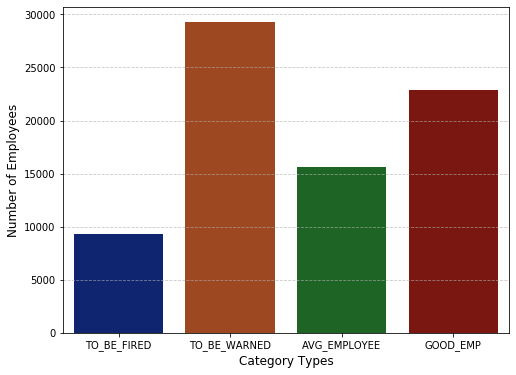

In [ ]:
df1 = pd.DataFrame({'Category': ['TO_BE_FIRED', 'TO_BE_WARNED', 'AVG_EMPLOYEE', 'GOOD_EMP'],
                   'Count': [x['TO_BE_FIRED'][0], x['TO_BE_WARNED'][0], x['AVG_EMPLOYEE'][0],x['GOOD_EMP'][0]]})
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Category', y='Count', data=df1, palette="dark")
plt.xlabel('Category Types', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()